<a href="https://colab.research.google.com/github/richa-bsingh/kaggle_data_vis/blob/main/spotify_streamed_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None) #automatic linebreaks and multiline cells

In [201]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

In [202]:
# Data cleaning and transformation

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [204]:
display(df)

track_name  \
0                                                                                            Seven (feat. Latto) (Explicit Ver.)   
1                                                                                                                           LALA   
2                                                                                                                        vampire   
3                                                                                                                   Cruel Summer   
4                                                                                                                 WHERE SHE GOES   
5                                                                                                                       Sprinter   
6                                                                                                                Ella Baila Sola   
7                                                                                                                       Columbia   
8                                                                                                                       fukumean   
9                                                                                                                La Bebe - Remix   
10                                                                                                                     un x100to   
11                                                                                                                     Super Shy   
12                                                                                                                       Flowers   
13                                                                                                                      Daylight   
14                                                                                                                     As It Was   
15                                                                                                                     Kill Bill   
16                                                                                                             Cupid - Twin Ver.   
17                                                                       What Was I Made For? [From The Motion Picture "Barbie"]   
18                                                                                                                    Classy 101   
19                                                                                                                    Like Crazy   
20                                                                                                                     LADY GAGA   
21                                                                           I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The    
22                                                                                                              I Wanna Be Yours   
23                                                                                      Peso Pluma: Bzrp Music Sessions, Vol. 55   
24                                 Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)   
25                                                                                                                   SABOR FRESA   
26                                                                                                 Calm Down (with Selena Gomez)   
27                                                                                                                  MOJABI GHOST   
28                                                                                                                    Last Night   
29                                                                                       Dance The Night (From Barbie The Album)   
30                        

In [205]:
df.rename(columns={'artist(s)_name':"artists"}, inplace=True)

In [206]:
missing_values = df.isnull().sum()

In [207]:
display(missing_values)

track_name               0
artists                  0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [208]:
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [209]:
#identifying null values in the in_shazam_charts column
df.loc[df['in_shazam_charts'].isnull()]
#print(len(df.loc[df['in_shazam_charts'].isnull()])) -- 50 rows

track_name  \
14                                As It Was   
54                             Another Love   
55                          Blinding Lights   
71                               Heat Waves   
73                          Sweater Weather   
86                        Someone You Loved   
127                        Watermelon Sugar   
158                                   Ghost   
159                     Under The Influence   
180                           Night Changes   
243                             Unstoppable   
274                                 Shivers   
320                      Gangsta's Paradise   
392                               Calm Down   
395                              Space Song   
403                One Kiss (with Dua Lipa)   
410       INDUSTRY BABY (feat. Jack Harlow)   
429                              Bad Habits   
434                                   Woman   
440                                Payphone   
441         All I Want for Christmas Is You   
442                          Last Christmas   
443       Rockin' Around The Christmas Tree   
444                        Jingle Bell Rock   
446                           Santa Tell Me   
449                                 Snowman   
500                              ýýýabcdefu   
501                               Sacrifice   
504                             Out of Time   
506               We Don't Talk About Bruno   
507                                   Pepas   
513                                good 4 u   
518                            Need To Know   
519          MONTERO (Call Me By Your Name)   
520                love nwantiti (ah ah ah)   
529                                   MONEY   
531                       Happier Than Ever   
532       Moth To A Flame (with The Weeknd)   
533                                 traitor   
534                                   Toxic   
535                         drivers license   
549                   Love Nwantiti - Remix   
554  Peaches (feat. Daniel Caesar & Giveon)   
560                            Life Goes On   
566                                Dynamite   
584                  Mood (feat. Iann Dior)   
620                            Dance Monkey   
625                                  Arcade   
727            Somebody That I Used To Know   
927     I Really Want to Stay at Your House   

                                                                                                      artists  \
14                                                                                               Harry Styles   
54                                                                                                  Tom Odell   
55                                                                                                 The Weeknd   
71                                                                                              Glass Animals   
73                                                                                          The Neighbourhood   
86                                                                                              Lewis Capaldi   
127                                                                                              Harry Styles   
158                                                                                             Justin Bieber   
159                                                                                               Chris Brown   
180                                                                                             One Direction   
243                                                                                                       Sia   
274                                                                                                Ed Sheeran   
320                                                                                              Coolio, L.V.   
392                                                  

In [210]:
print(len(df))

953


In [211]:
df['in_shazam_charts'] = df['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)
df['in_shazam_charts'].fillna(0, inplace = True)
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)

print('Missing "in_shazam_charts" values after removal : ', df['in_shazam_charts'].isnull().sum())

Missing "in_shazam_charts" values after removal :  0


In [212]:
df = df.dropna(subset=['key'])

print('Missing "key" values after removal : ', df['key'].isnull().sum())

Missing "key" values after removal :  0


In [213]:
df.dtypes

track_name              object
artists                 object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [214]:
df.select_dtypes(include=['object','bool','category']).columns.tolist()

['track_name', 'artists', 'streams', 'in_deezer_playlists', 'key', 'mode']

In [215]:
df[['streams' ,'in_deezer_playlists']]

streams  \
0                                                                                                 141381703   
1                                                                                                 133716286   
2                                                                                                 140003974   
3                                                                                                 800840817   
4                                                                                                 303236322   
5                                                                                                 183706234   
6                                                                                                 725980112   
7                                                                                                  58149378   
8                                                                                                  95217315   
9                                                                                                 553634067   
10                                                                                                505671438   
11                                                                                                 58255150   
13                                                                                                387570742   
14                                                                                               2513188493   
15                                                                                               1163093654   
16                                                                                                496795686   
18                                                                                                335222234   
19                                                                                                363369738   
20                                                                                                 86444842   
21                                                                                                 52135248   
23                                                                                                200647221   
24                                                                                                115364561   
25                                                                                                 78300654   
26                                                                                                899183384   
27                                                                                                 61245289   
28                                                                                                429829812   
29                                                                                                127408954   
30                                                                                                 22581161   
31                                                                                                 52294266   
32                                                                                                843957510   
33                                                                                                999748277   
34                                                                                                618990393   
36                                                                                                188933502   
37                                                                                               1355959075   
38                                                                                                786181836   
39                                                                                                176553

In [216]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

In [217]:
df.loc[df['streams'].isnull()]

track_name            artists  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts  streams  in_apple_playlists  in_apple_charts  \
574                  0      NaN                  16                0   

     in_deezer_playlists  in_deezer_charts  in_shazam_charts  bpm key   mode  \
574                 54.0                 0                 0  110   A  Major   

     danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
574              53         75        69               7                   0   

     liveness_%  speechiness_%  
574          17              3

In [218]:
df.loc[df['in_deezer_playlists'].isnull()]

track_name  \
48                                         Starboy   
54                                    Another Love   
55                                 Blinding Lights   
65                                          Yellow   
73                                 Sweater Weather   
75                                    Viva La Vida   
80                                         Riptide   
86                               Someone You Loved   
88                                          Makeba   
98                              Summertime Sadness   
103                                    Mockingbird   
106                        Cold Heart - PNAU Remix   
109                           Set Fire to the Rain   
114              Everybody Wants To Rule The World   
126               Can't Hold Us (feat. Ray Dalton)   
128                           lovely - Bonus Track   
138                                        Perfect   
140                                       Believer   
143                                     Without Me   
147                         Somewhere Only We Know   
157                                 Counting Stars   
162                                      One Dance   
168                                  We Found Love   
172                               Do I Wanna Know?   
173                                         Demons   
176                                   Shake It Off   
177       Why'd You Only Call Me When You're High?   
179                                   Shape of You   
182                                          Creep   
188                           Just The Way You Are   
189                              Take Me To Church   
199                                     Take On Me   
243                                    Unstoppable   
250                            The Real Slim Shady   
296             Lose Yourself - Soundtrack Version   
297                                       Superman   
324                           Say You Won't Let Go   
331                                           Numb   
358                                     In The End   
400                           I'm Not The Only One   
403                       One Kiss (with Dua Lipa)   
407                                Don't Start Now   
440                                       Payphone   
441                All I Want for Christmas Is You   
442                                 Last Christmas   
593                            Rolling in the Deep   
604                                         No Lie   
615                                     The Nights   
620                                   Dance Monkey   
623                                      All of Me   
624      Smells Like Teen Spirit - Remastered 2021   
630                                 Mr. Brightside   
634                                        Shallow   
640                               'Till I Collapse   
641                                       Memories   
649                                   Still D.R.E.   
653                               The Next Episode   
658                                     In Da Club   
668  California Love - Original Version (Explicit)   
669                               Forgot About Dre   
672                                        HUMBLE.   
673                                           Stan   
685                              Thinking Out Loud   
693                                      Seï¿½ï¿½o   
697         Something In The Way - Remastered 2021   
720                        Wake Me Up - Radio Edit   
724                       Something Just Like This   
725                                         Closer   
754                There's Nothing Holdin' Me Back   
757                         Get Lucky - Radio Edit   
761                                     Photograph   
762                                  Love Yourself   
871                            Sweet Child O' Mine   
893                                      Hea

In [219]:
missing_values = df.isnull().sum()
print(missing_values)
#missing_values[missing_values > 0]

track_name               0
artists                  0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     75
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [220]:
df['streams'].fillna(0, inplace=True)
df['streams'] = df['streams'].astype("int")
df['in_deezer_playlists'].fillna(0, inplace=True)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype("int")

In [221]:
#no null values in any of the columns in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [222]:
def to_month_name(month):
    month_names = ["", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return month_names[month]

In [223]:
df['released_month'] = (df['released_month']).apply(to_month_name)

In [224]:
df.head()

track_name           artists  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year released_month  released_day  in_spotify_playlists  \
0           2023           July            14                   553   
1           2023          March            23                  1474   
2           2023           June            30                  1397   
3           2019         August            23                  7858   
4           2023            May            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  in_apple_charts  \
0                147  141381703                  43              263   
1                 48  133716286                  48              126   
2                113  140003974                  94              207   
3                100  800840817                 116              207   
4                 50  303236322                  84              133   

   in_deezer_playlists  in_deezer_charts  in_shazam_charts  bpm key   mode  \
0                   45                10               826  125   B  Major   
1                   58                14               382   92  C#  Major   
2                   91                14               949  138   F  Major   
3                  125                12               548  170   A  Major   
4                   87                15               425  144   A  Minor   

   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0              80         89        83              31                   0   
1              71         61        74               7                   0   
2              51         32        53              17                   0   
3              55         58        72              11                   0   
4              65         23        80              14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6

In [225]:
artists = []

for row in df['artists']:
    item = row.split(',')
    artists.append(item)

df['artists'] = artists
df.head()

track_name              artists  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  [Latto,  Jung Kook]             2   
1                                 LALA        [Myke Towers]             1   
2                              vampire     [Olivia Rodrigo]             1   
3                         Cruel Summer       [Taylor Swift]             1   
4                       WHERE SHE GOES          [Bad Bunny]             1   

   released_year released_month  released_day  in_spotify_playlists  \
0           2023           July            14                   553   
1           2023          March            23                  1474   
2           2023           June            30                  1397   
3           2019         August            23                  7858   
4           2023            May            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  in_apple_charts  \
0                147  141381703                  43              263   
1                 48  133716286                  48              126   
2                113  140003974                  94              207   
3                100  800840817                 116              207   
4                 50  303236322                  84              133   

   in_deezer_playlists  in_deezer_charts  in_shazam_charts  bpm key   mode  \
0                   45                10               826  125   B  Major   
1                   58                14               382   92  C#  Major   
2                   91                14               949  138   F  Major   
3                  125                12               548  170   A  Major   
4                   87                15               425  144   A  Minor   

   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0              80         89        83              31                   0   
1              71         61        74               7                   0   
2              51         32        53              17                   0   
3              55         58        72              11                   0   
4              65         23        80              14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6

In [243]:
artists_flattened = []
for item in artists:
    artists_flattened.extend(item)
artists_true_counts = pd.Series(artists_flattened).value_counts()
#artists_true_counts.columns = ['Artists', 'Count']

#artists_true_counts['Artists']= artists_true_counts['Artists'].str.strip()
display(artists_true_counts)
artists_true_counts.info()

Taylor Swift                                             31
The Weeknd                                               27
Bad Bunny                                                23
Kendrick Lamar                                           23
SZA                                                      21
Drake                                                    18
Feid                                                     15
Harry Styles                                             13
 Bad Bunny                                               13
 Metro Boomin                                            12
 21 Savage                                               12
Ed Sheeran                                               11
Morgan Wallen                                            10
 Peso Pluma                                              10
Eminem                                                    9
BTS                                                       8
Karol G                                 

<class 'pandas.core.series.Series'>
Index: 746 entries, Taylor Swift to  Paulo Londra
Series name: None
Non-Null Count  Dtype
--------------  -----
746 non-null    int64
dtypes: int64(1)
memory usage: 27.8+ KB


In [248]:
artists_flattened = [item for sublist in artists for item in sublist]

# Create a pandas Series and get the value counts
artists_true_counts = pd.Series(artists_flattened).value_counts()

artists_df = pd.DataFrame({'Artist': artists_true_counts.index, 'Count': artists_true_counts.values})

# Remove whitespace from the 'Artist' column
artists_df['Artist'] = artists_df['Artist'].str.strip()

# Display the DataFrame
display(artists_df)

# Optionally, you can also display additional information about the DataFrame
artists_df.info()

Artist  Count
0                                            Taylor Swift     31
1                                              The Weeknd     27
2                                               Bad Bunny     23
3                                          Kendrick Lamar     23
4                                                     SZA     21
5                                                   Drake     18
6                                                    Feid     15
7                                            Harry Styles     13
8                                               Bad Bunny     13
9                                            Metro Boomin     12
10                                              21 Savage     12
11                                             Ed Sheeran     11
12                                          Morgan Wallen     10
13                                             Peso Pluma     10
14                                                 Eminem      9
15                                                    BTS      8
16                                                Karol G      7
17                                               Doja Cat      7
18                                         Olivia Rodrigo      7
19                                               Dua Lipa      6
20                                          Fuerza Regida      6
21                                            The Creator      6
22                                               Labrinth      6
23                                             Kanye West      6
24                                                Quevedo      6
25                                         Rauw Alejandro      6
26                                               NewJeans      6
27                                         Grupo Frontera      6
28                                                   Feid      6
29                                               Bizarrap      5
30                                          Justin Bieber      5
31                                         Rauw Alejandro      5
32                                        Imagine Dragons      5
33                                             Bruno Mars      5
34                                                 Future      5
35                                                 Future      5
36                                                Quevedo      5
37                                            Nicki Minaj      5
38                                                  Tyler      4
39                                               Lil Baby      4
40                                               Coldplay      4
41                                                  Adele      4
42                                            Jack Harlow      4
43                                            Don Toliver      4
44                                           Lana Del Rey      4
45                                              Mï¿½ï¿½ne      4
46                                            Post Malone      4
47                                               Bizarrap      4
48                                                   Mora      4
49                                            Jhay Cortez      4
50                                              Tiago pzk      4
51                                          Calvin Harris      4
52                                           Shawn Mendes      4
53                                          Billie Eilish      3
54                                                Shakira      3
55                                               Anuel Aa      3
56                                           Arijit Singh      3
57                                          Natanael Cano      3
58                                               Arcangel      3
59                                              Lady Gaga      3
60                                                ENHYPEN      3
61                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  746 non-null    object
 1   Count   746 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


Text(0, 0.5, 'Artist Name')

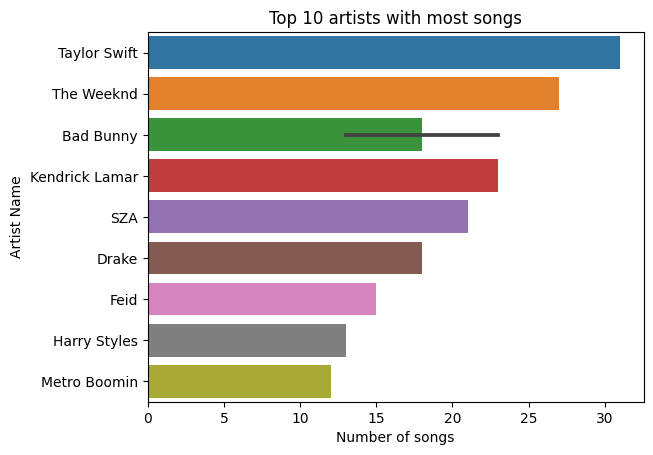

In [252]:
artists_series = artists_df.set_index('Artist')['Count'].squeeze()

# Display the resulting Series
#display(artists_series)

top_artists = artists_series.head(10)

sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 artists with most songs")
plt.xlabel("Number of songs")
plt.ylabel("Artist Name")

In [256]:

combined_artists_df = artists_df.groupby('Artist')['Count'].sum().reset_index()
combined_artists_df = combined_artists_df.sort_values(by='Count', ascending=False)

display(combined_artists_df)

Artist  Count
61                                              Bad Bunny     36
564                                          Taylor Swift     32
584                                            The Weeknd     29
292                                        Kendrick Lamar     23
502                                                   SZA     21
188                                                  Feid     21
166                                                 Drake     18
224                                          Harry Styles     13
3                                               21 Savage     13
392                                          Metro Boomin     13
458                                            Peso Pluma     12
171                                            Ed Sheeran     12
478                                        Rauw Alejandro     11
472                                               Quevedo     11
402                                         Morgan Wallen     11
56                                                    BTS     11
160                                              Doja Cat     10
202                                                Future     10
76                                               Bizarrap      9
167                                              Dua Lipa      9
181                                                Eminem      9
285                                               Karol G      8
436                                        Olivia Rodrigo      7
326                                              Lil Baby      6
214                                        Grupo Frontera      6
283                                            Kanye West      6
273                                              Junior H      6
275                                         Justin Bieber      6
313                                              Labrinth      6
604                                                 Tyler      6
315                                          Lana Del Rey      6
597                                          Travis Scott      6
422                                              NewJeans      6
571                                           The Creator      6
200                                         Fuerza Regida      6
165                                               Dr. Dre      5
161                                           Don Toliver      5
122                                              Coldplay      5
424                                           Nicki Minaj      5
522                                               Shakira      5
588                                                  Tini      5
88                                             Bruno Mars      5
96                                          Calvin Harris      5
468                                           Post Malone      5
233                                       Imagine Dragons      5
223                                                Halsey      5
40                                               Anuel Aa      5
373                                         Maria Becerra      4
144                                          David Guetta      4
272                                             Jung Kook      4
318                                  Lauren Spencer Smith      4
16                                                  Adele      4
515                                                  Sech      4
237                                              J Balvin      4
243                                           Jack Harlow      4
328                                             Lil Nas X      4
475                                              ROSALï¿½      4
255                                           Jhay Cortez      4
587                                             Tiago pzk      4
257                                                 Jimin      4
415                                         Natanael Cano      4
70                   

Text(0, 0.5, 'Artist Name')

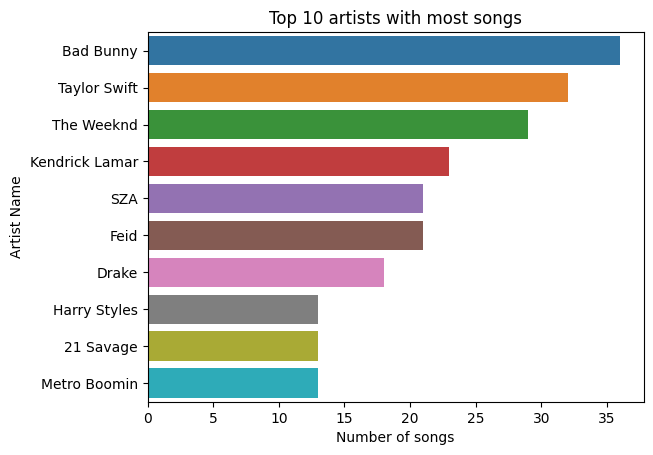

In [257]:
artists_series = combined_artists_df.set_index('Artist')['Count'].squeeze()

# Display the resulting Series
#display(artists_series)

top_artists = artists_series.head(10)

sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 artists with most songs")
plt.xlabel("Number of songs")
plt.ylabel("Artist Name")

Text(0, 0.5, 'Track Name')

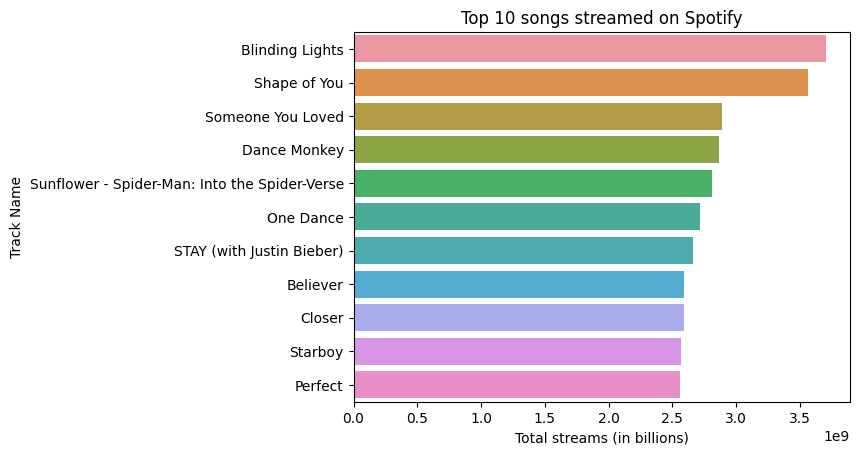

In [258]:
top_streamed_spotify = df[['track_name', 'artists' , 'streams', 'released_year']].sort_values(by='streams', ascending=False);

sns.barplot(x=top_streamed_spotify[:11]['streams'], y=top_streamed_spotify[:11]['track_name'])
plt.title("Top 10 songs streamed on Spotify")
plt.xlabel("Total streams (in billions)")
plt.ylabel("Track Name")

Text(0, 0.5, 'Track Name')

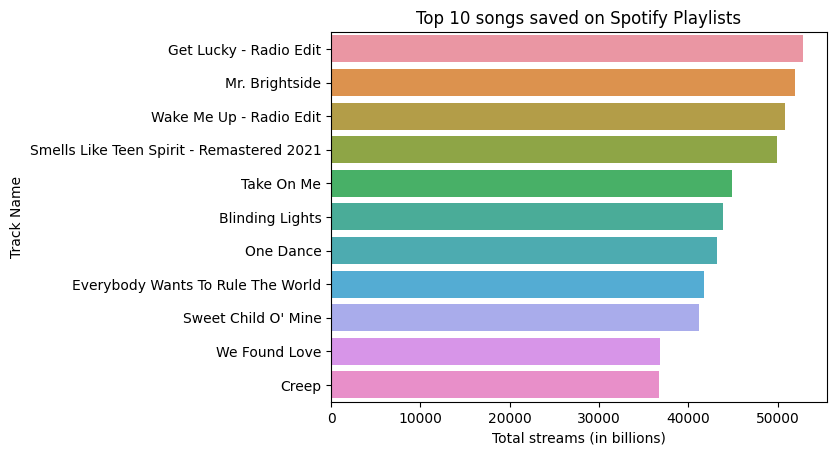

In [283]:
top_saved_spotify = df[['track_name', 'artists' , 'in_spotify_playlists', 'released_year']].sort_values(by='in_spotify_playlists', ascending=False);

sns.barplot(x=top_saved_spotify[:11]['in_spotify_playlists'], y=top_saved_spotify[:11]['track_name'])
plt.title("Top 10 songs saved on Spotify Playlists")
plt.xlabel("Total streams (in billions)")
plt.ylabel("Track Name")

Text(0, 0.5, 'Track Name')

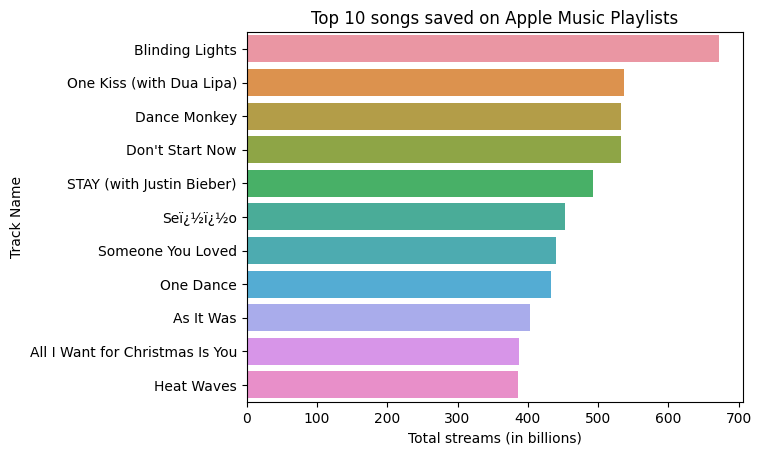

In [284]:
top_saved_apple = df[['track_name', 'artists' , 'in_apple_playlists', 'released_year']].sort_values(by='in_apple_playlists', ascending=False);

sns.barplot(x=top_saved_apple[:11]['in_apple_playlists'], y=top_saved_apple[:11]['track_name'])
plt.title("Top 10 songs saved on Apple Music Playlists")
plt.xlabel("Total streams (in billions)")
plt.ylabel("Track Name")

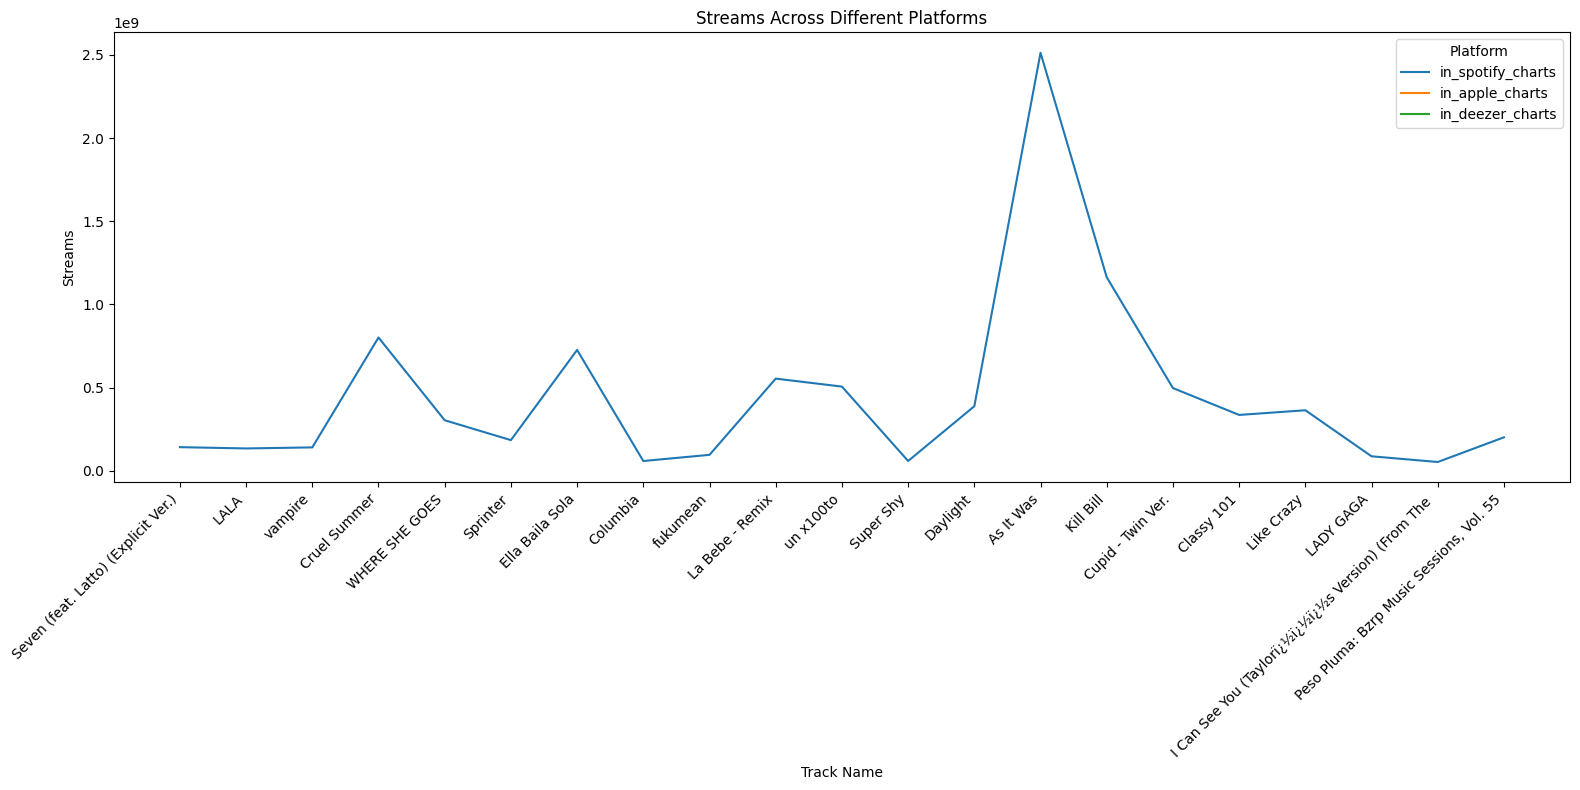

In [279]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

sns.lineplot(x=df[:21]['track_name'], y=df[:21]['streams'], data=df.melt(id_vars=['track_name'], value_vars=['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']),
             hue='variable', errorbar=None)
plt.title('Streams Across Different Platforms')
plt.xlabel('Track Name')
plt.ylabel('Streams')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


In [280]:
cross_platform_columns = [
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]

In [281]:
cross_platform_corr_matrix = df[cross_platform_columns].corr()
cross_platform_corr_matrix

in_spotify_playlists  in_spotify_charts  \
in_spotify_playlists              1.000000           0.173546   
in_spotify_charts                 0.173546           1.000000   
in_apple_playlists                0.708098           0.235219   
in_apple_charts                   0.259416           0.552055   
in_deezer_playlists               0.236444           0.097009   
in_deezer_charts                  0.147870           0.581850   
in_shazam_charts                  0.061743           0.537464   

                      in_apple_playlists  in_apple_charts  \
in_spotify_playlists            0.708098         0.259416   
in_spotify_charts               0.235219         0.552055   
in_apple_playlists              1.000000         0.408858   
in_apple_charts                 0.408858         1.000000   
in_deezer_playlists             0.412618         0.163386   
in_deezer_charts                0.359203         0.371166   
in_shazam_charts                0.086826         0.390395   

                      in_deezer_playlists  in_deezer_charts  in_shazam_charts  
in_spotify_playlists             0.236444          0.147870          0.061743  
in_spotify_charts                0.097009          0.581850          0.537464  
in_apple_playlists               0.412618          0.359203          0.086826  
in_apple_charts                  0.163386          0.371166          0.390395  
in_deezer_playlists              1.000000          0.274779          0.033729  
in_deezer_charts                 0.274779          1.000000          0.344083  
in_shazam_charts                 0.033729          0.344083          1.000000

In [282]:
attribute_columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
attribute_corr_matrix = df[attribute_columns].corr()
attribute_corr_matrix

danceability_%  valence_%  energy_%  acousticness_%  \
danceability_%            1.000000   0.396207  0.165901       -0.239009   
valence_%                 0.396207   1.000000  0.346939       -0.066854   
energy_%                  0.165901   0.346939  1.000000       -0.561699   
acousticness_%           -0.239009  -0.066854 -0.561699        1.000000   
instrumentalness_%       -0.098955  -0.144301 -0.050383        0.043474   
liveness_%               -0.093731   0.010722  0.103557       -0.043107   
speechiness_%             0.197493   0.039952 -0.025579       -0.019154   
bpm                      -0.161281   0.026882  0.015911       -0.012354   

                    instrumentalness_%  liveness_%  speechiness_%       bpm  
danceability_%               -0.098955   -0.093731       0.197493 -0.161281  
valence_%                    -0.144301    0.010722       0.039952  0.026882  
energy_%                     -0.050383    0.103557      -0.025579  0.015911  
acousticness_%                0.043474   -0.043107      -0.019154 -0.012354  
instrumentalness_%            1.000000   -0.044848      -0.088013 -0.005166  
liveness_%                   -0.044848    1.000000      -0.015632 -0.003060  
speechiness_%                -0.088013   -0.015632       1.000000  0.046743  
bpm                          -0.005166   -0.003060       0.046743  1.000000

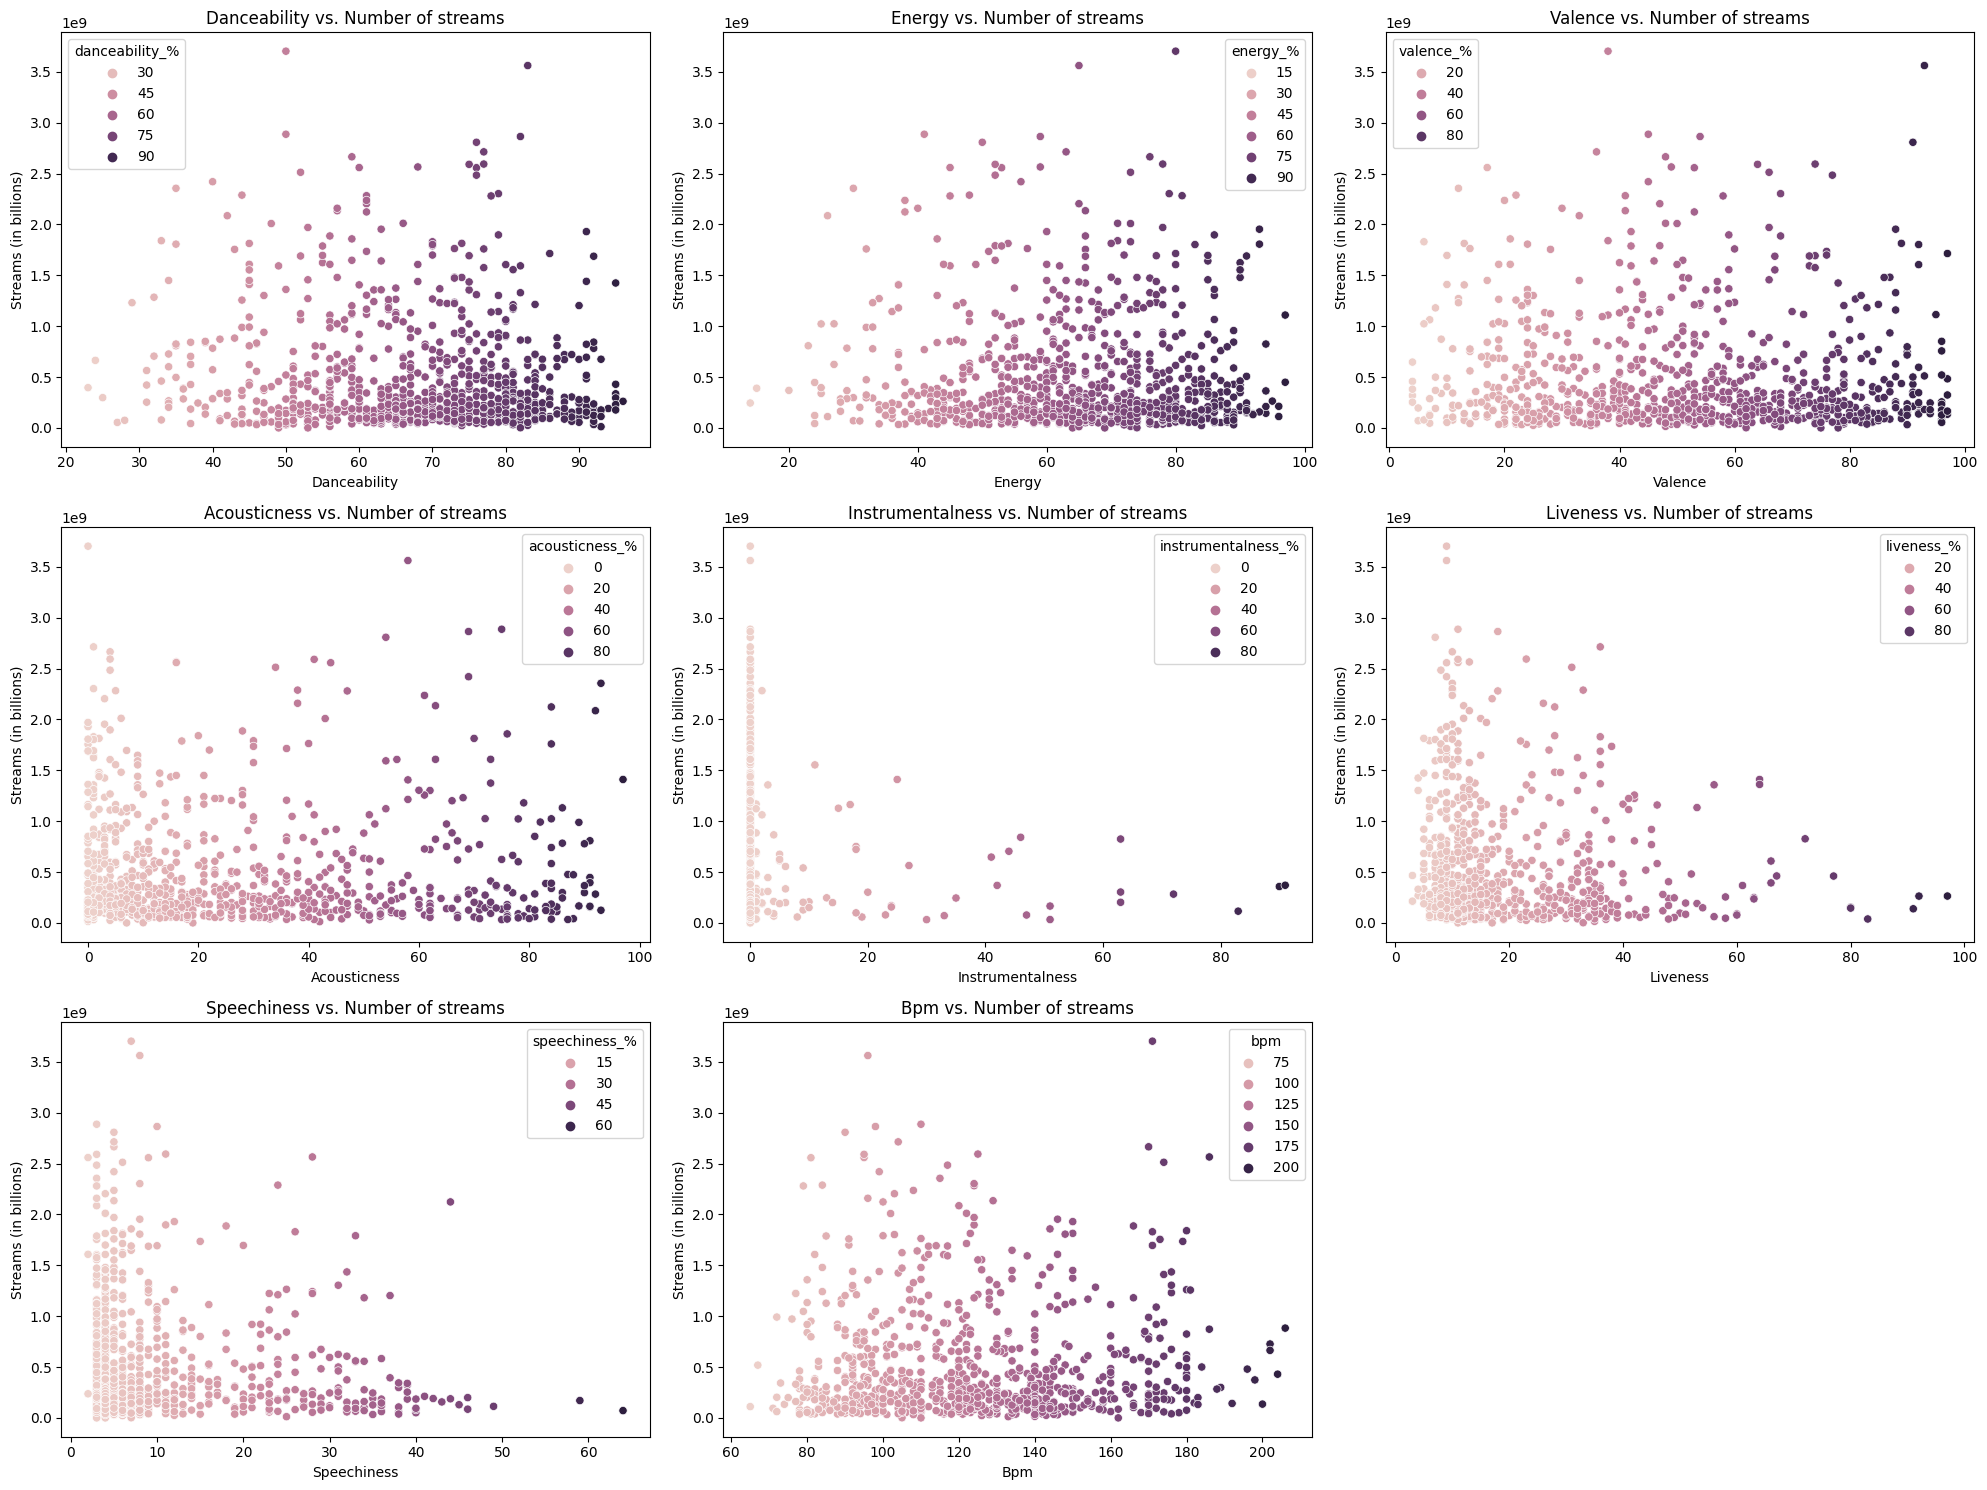

In [285]:
features_columns = ['danceability_%', 'energy_%', 'valence_%', "acousticness_%",  "instrumentalness_%", "liveness_%", "speechiness_%", "bpm"]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_columns, start=1):
    plt.subplot(3, 3, i)
    plt.title(feature.replace("_%","").capitalize() + " vs. Number of streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%","").capitalize())
    sns.scatterplot(x=df[feature], y=df['streams'], hue=df[feature])

plt.tight_layout()

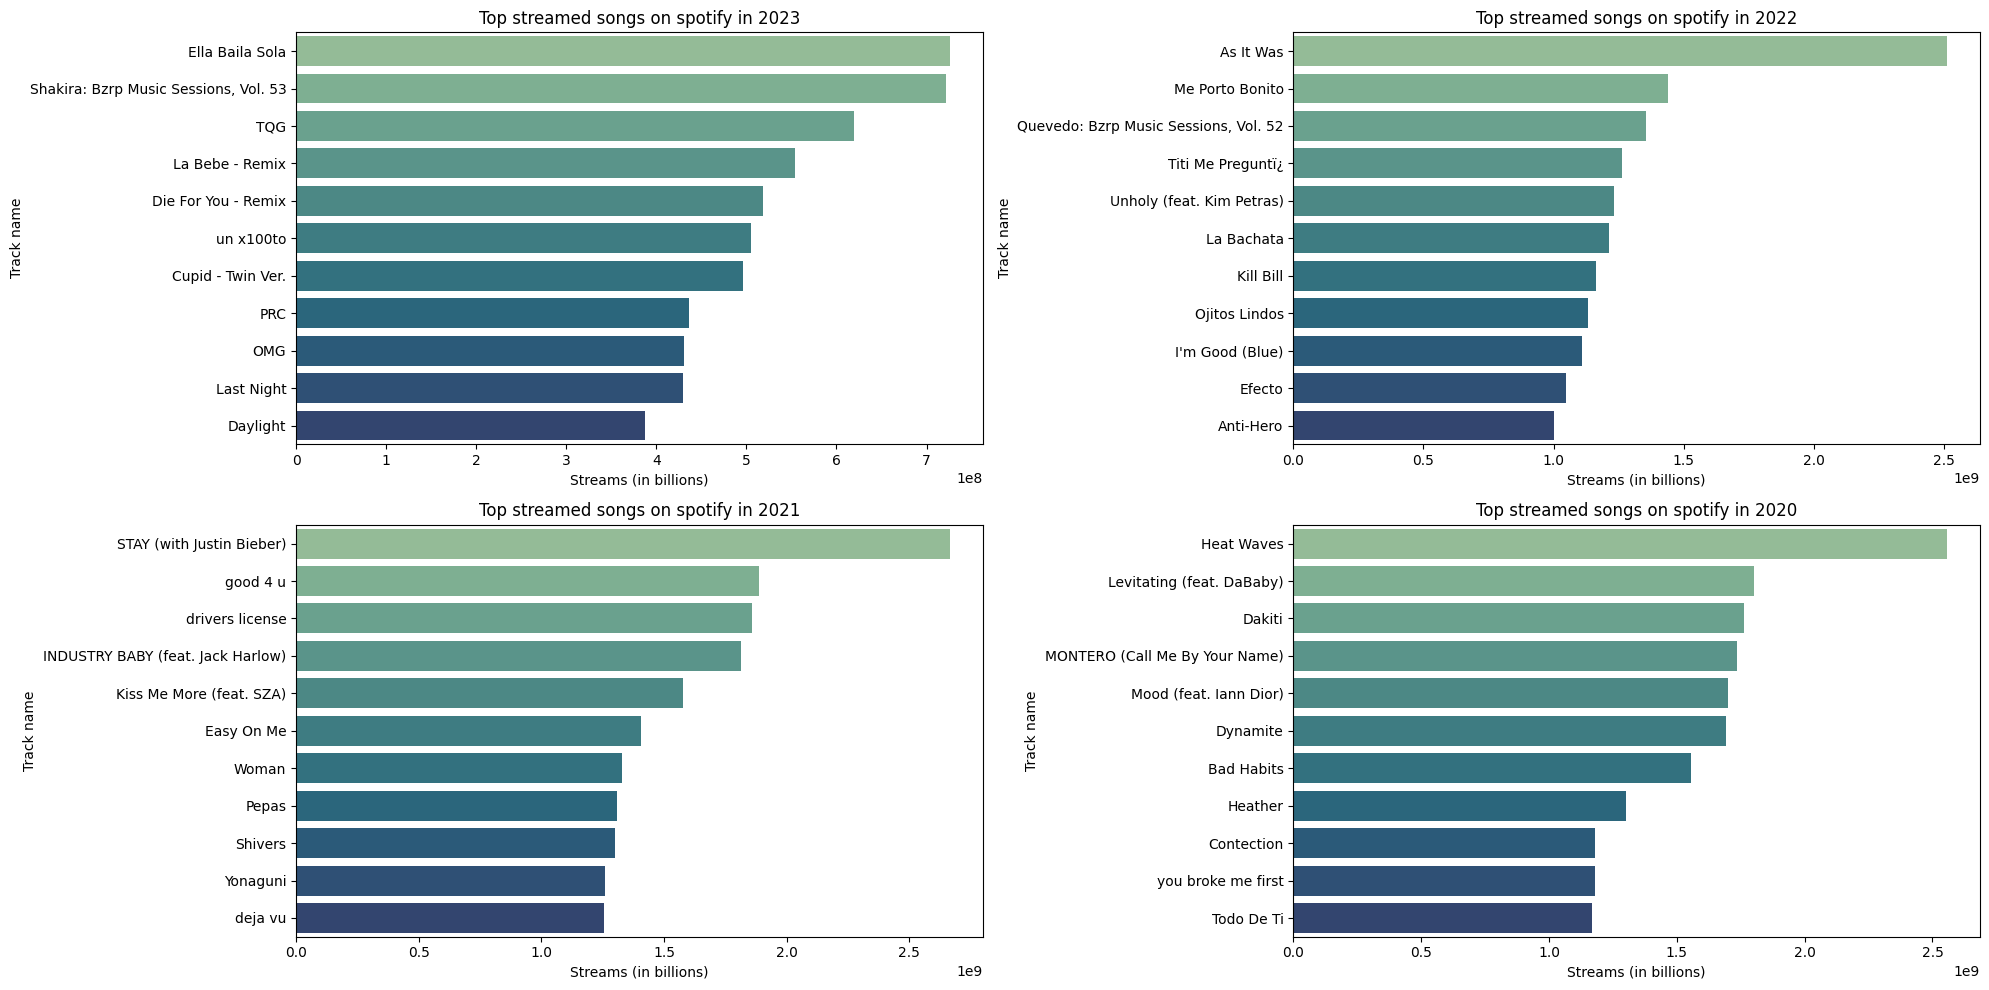

In [289]:
#top streaming songs on spotify in years 2020-2023
years = ['2023','2022', '2021', '2020']

plt.figure(figsize=(20, 10))
for i, year in enumerate(years, start=1):
    plt.subplot(2, 2, i)
    top_spotify_songs = df[df.released_year == int(year)].sort_values(by='streams', ascending=False)
    sns.barplot(x = top_spotify_songs['streams'][:11], y = top_spotify_songs['track_name'][:11], palette = 'crest')
    plt.title("Top streamed songs on spotify in " + year)
    plt.ylabel('Track name')
    plt.xlabel('Streams (in billions)')

plt.tight_layout()